In [1]:
import pandas as pd

# Load the dataset (adjust the file path as needed)
df = pd.read_csv("data/predictive_maintenance.csv")

# Display the first few rows to understand its structure
df.head()


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [2]:
import re

def clean_column_names(df):
    df = df.copy()
    df.columns = [re.sub(r'[\[\]<>]', '', col).replace(' ', '_') for col in df.columns]
    return df

# Clean the dataframe's column names
df = clean_column_names(df)
print("Cleaned columns:", df.columns)


Cleaned columns: Index(['UDI', 'Product_ID', 'Type', 'Air_temperature_K',
       'Process_temperature_K', 'Rotational_speed_rpm', 'Torque_Nm',
       'Tool_wear_min', 'Target', 'Failure_Type'],
      dtype='object')


In [3]:
print(df.info())
print(df.describe())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   UDI                    10000 non-null  int64  
 1   Product_ID             10000 non-null  object 
 2   Type                   10000 non-null  object 
 3   Air_temperature_K      10000 non-null  float64
 4   Process_temperature_K  10000 non-null  float64
 5   Rotational_speed_rpm   10000 non-null  int64  
 6   Torque_Nm              10000 non-null  float64
 7   Tool_wear_min          10000 non-null  int64  
 8   Target                 10000 non-null  int64  
 9   Failure_Type           10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB
None
               UDI  Air_temperature_K  Process_temperature_K  \
count  10000.00000       10000.000000           10000.000000   
mean    5000.50000         300.004930             310.005560   
std    

In [5]:
#Drop 'UDI' and 'Product ID' from the dataset
df = df.drop(['UDI', 'Product_ID'], axis=1)
print("Remaining columns:", df.columns)

Remaining columns: Index(['Type', 'Air_temperature_K', 'Process_temperature_K',
       'Rotational_speed_rpm', 'Torque_Nm', 'Tool_wear_min', 'Target',
       'Failure_Type'],
      dtype='object')



Failure Type Distribution:
Failure_Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64


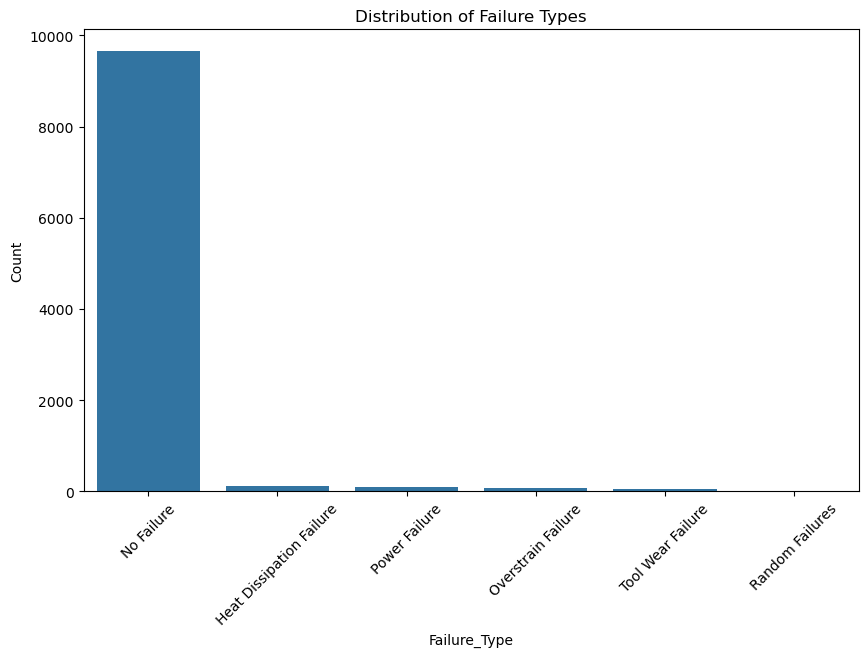

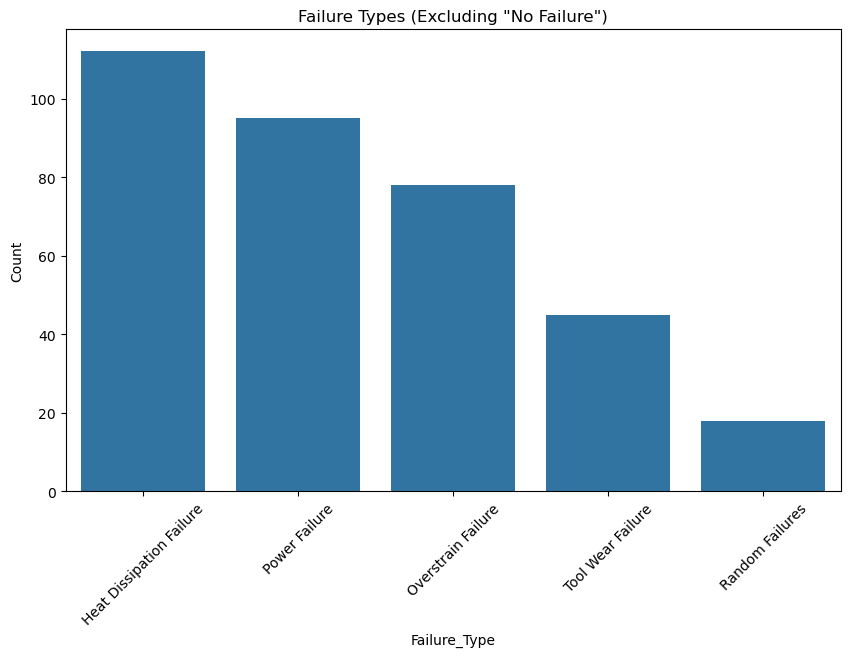

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Examine the distribution of the Failure Type column
failure_counts = df['Failure_Type'].value_counts()
print("\nFailure Type Distribution:")
print(failure_counts)

# Plot the overall distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Failure_Type', order=failure_counts.index)
plt.title('Distribution of Failure Types')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

# Plot actual failure types (excluding "No Failure")
failure_only = df[df['Failure_Type'] != 'No Failure']
plt.figure(figsize=(10, 6))
sns.countplot(data=failure_only, x='Failure_Type', order=failure_only['Failure_Type'].value_counts().index)
plt.title('Failure Types (Excluding "No Failure")')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()


In [11]:
import pandas as pd

# Create a crosstab to see how 'Target' and 'Failure_Type' align
ct = pd.crosstab(df['Target'], df['Failure_Type'])
print("Crosstab of Target vs. Failure_Type:")
print(ct)


Crosstab of Target vs. Failure_Type:
Failure_Type  Heat Dissipation Failure  No Failure  Overstrain Failure  \
Target                                                                   
0                                    0        9643                   0   
1                                  112           9                  78   

Failure_Type  Power Failure  Random Failures  Tool Wear Failure  
Target                                                           
0                         0               18                  0  
1                        95                0                 45  


In [15]:
# Inconsistency where Target is 0 but Failure_Type is not 'No_Failure'
inconsistencies_0 = df[(df['Target'] == 0) & (df['Failure_Type'] != 'No Failure')]
print("Number of inconsistencies where Target is 0 but Failure_Type is not 'No Failure':", len(inconsistencies_0))

# Inconsistency where Target is 1 but Failure_Type is 'No_Failure'
inconsistencies_1 = df[(df['Target'] == 1) & (df['Failure_Type'] == 'No Failure')]
print("Number of inconsistencies where Target is 1 but Failure_Type is 'No Failure':", len(inconsistencies_1))


Number of inconsistencies where Target is 0 but Failure_Type is not 'No Failure': 18
Number of inconsistencies where Target is 1 but Failure_Type is 'No Failure': 9


In [20]:
print("Examples of inconsistencies (Target=0 but Failure_Type != 'No Failure'):")
print(inconsistencies_0.head())
#18 values have 'Target' = 0 but under failure type they are indicated as random failures as such these 18 datapoints
#should be dropped from the dataset


Examples of inconsistencies (Target=0 but Failure_Type != 'No_Failure'):
     Type  Air_temperature_K  Process_temperature_K  Rotational_speed_rpm  \
1221    M              297.0                  308.3                  1399   
1302    L              298.6                  309.8                  1505   
1748    H              298.4                  307.7                  1626   
2072    L              299.6                  309.5                  1570   
2559    L              299.3                  309.0                  1447   

      Torque_Nm  Tool_wear_min  Target     Failure_Type  
1221       46.4            132       0  Random Failures  
1302       45.7            144       0  Random Failures  
1748       31.1            166       0  Random Failures  
2072       35.5            189       0  Random Failures  
2559       50.4            140       0  Random Failures  


In [21]:
print("Examples of inconsistencies (Target=1 but Failure_Type == 'No_Failure'):")
print(inconsistencies_1.head())
#9 values have 'Target' = 1 but are indicated as No Failure as such these datapoints should also be dropped.

Examples of inconsistencies (Target=1 but Failure_Type == 'No_Failure'):
     Type  Air_temperature_K  Process_temperature_K  Rotational_speed_rpm  \
1437    H              298.8                  309.9                  1439   
2749    M              299.7                  309.2                  1685   
4044    M              301.9                  310.9                  1419   
4684    M              303.6                  311.8                  1421   
5536    M              302.3                  311.8                  1363   

      Torque_Nm  Tool_wear_min  Target Failure_Type  
1437       45.2             40       1   No Failure  
2749       28.9            179       1   No Failure  
4044       47.7             20       1   No Failure  
4684       44.8            101       1   No Failure  
5536       54.0            119       1   No Failure  


In [24]:
# Identify indices for inconsistent rows
inconsistencies_0 = df[(df['Target'] == 0) & (df['Failure_Type'] != 'No Failure')].index
inconsistencies_1 = df[(df['Target'] == 1) & (df['Failure_Type'] == 'No Failure')].index

# Combine indices to drop
indices_to_drop = inconsistencies_0.union(inconsistencies_1)

# Drop these rows
df_clean = df.drop(indices_to_drop)

print("Number of dropped rows:", len(indices_to_drop))
print("New dataset shape:", df_clean.shape)


Number of dropped rows: 27
New dataset shape: (9973, 8)


In [32]:
#Select numeric columns only
numeric_df = df_clean.select_dtypes(include=['int64', 'float64'])

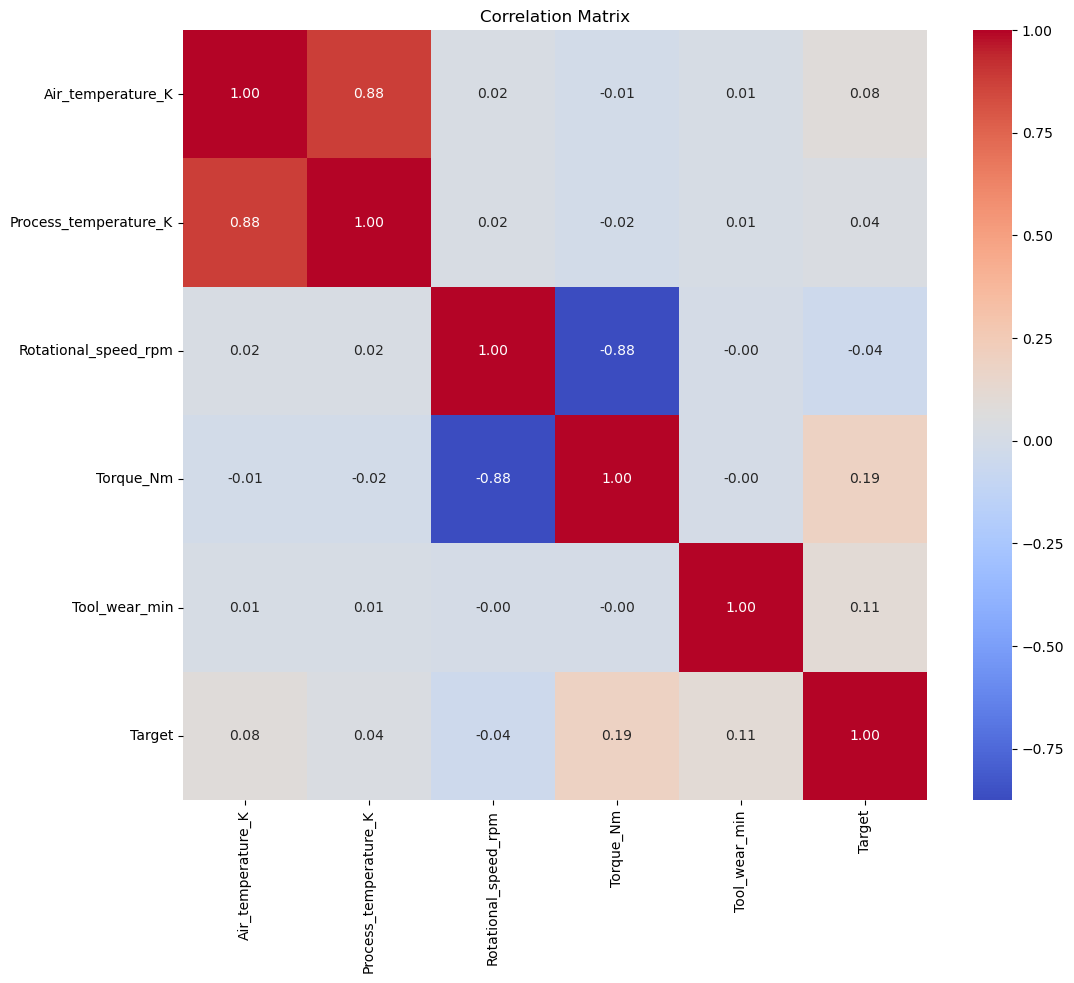

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = numeric_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

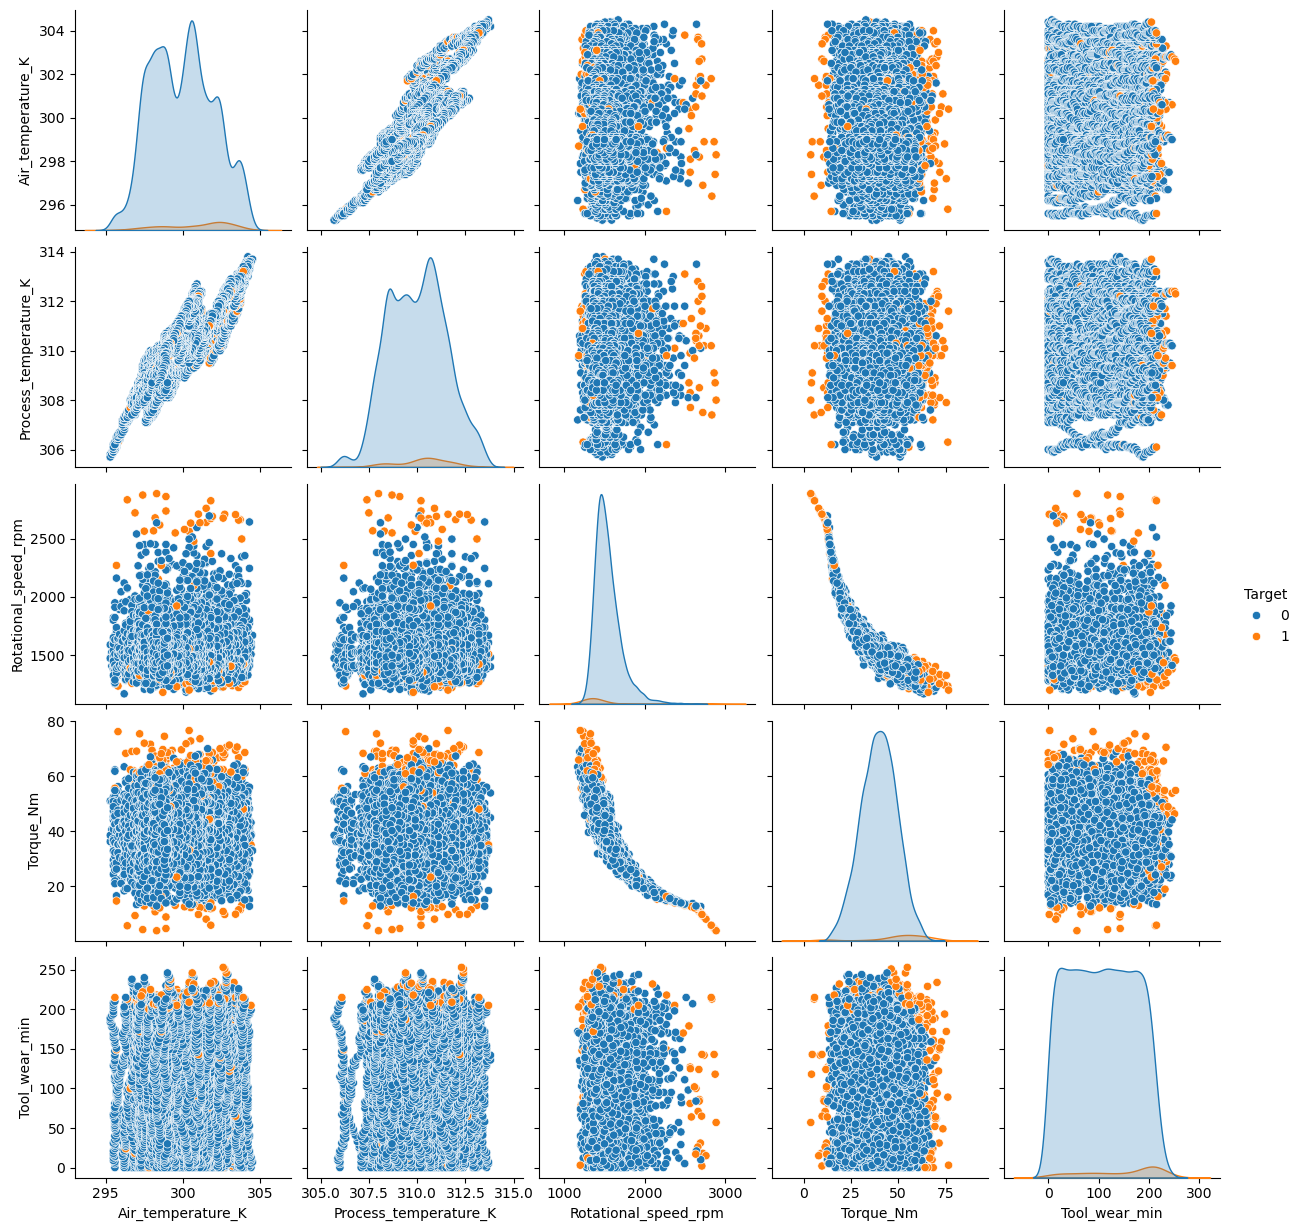

In [35]:
# Plot the pairplot
sns.pairplot(numeric_df,hue = 'Target')
plt.show()

In [37]:
# Calculate the failure percentage for each product type
failure_percentage_by_type = df_clean.groupby('Type')['Target'].mean() * 100

print("Failure Percentage by Product Type:")
print(failure_percentage_by_type)


Failure Percentage by Product Type:
Type
H    2.004008
L    3.860294
M    2.641257
Name: Target, dtype: float64


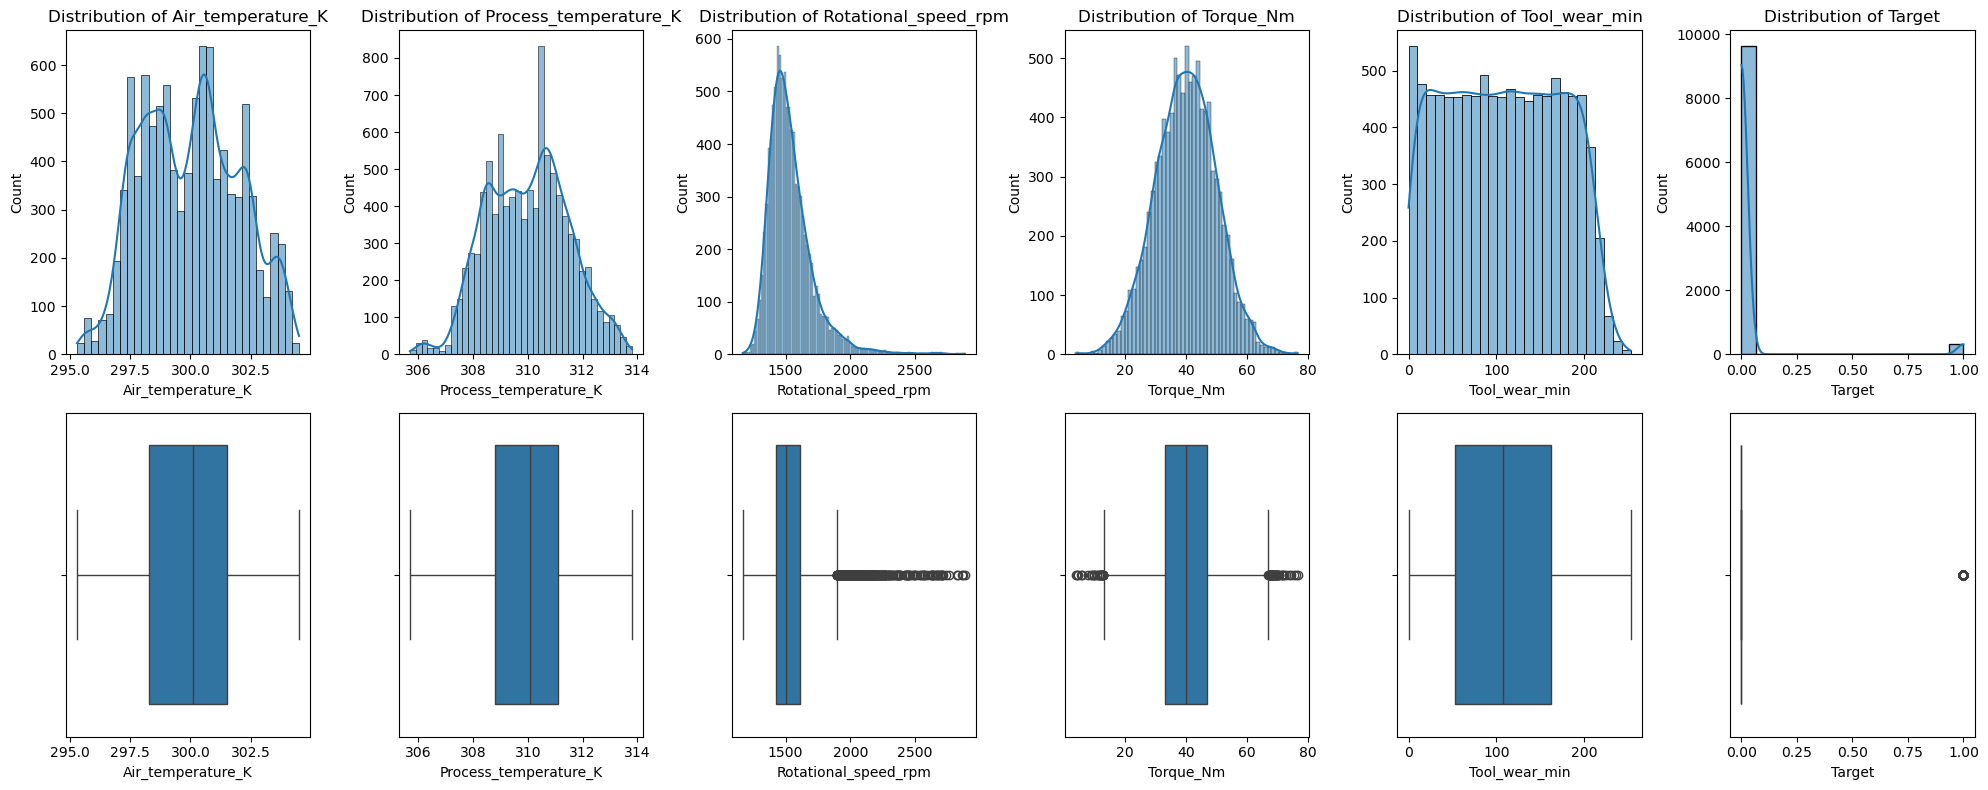

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the first 12 numeric columns from your cleaned dataframe
numeric_cols = list(df_clean.select_dtypes(include=['int64', 'float64']).columns)[:12]

# Create a figure with 2 rows and 6 columns
fig, axes = plt.subplots(2, 6, figsize=(20, 8))

for i, col in enumerate(numeric_cols):
    # Plot histogram with KDE on the top row
    ax_hist = axes[0, i]
    sns.histplot(df_clean[col], kde=True, ax=ax_hist)
    ax_hist.set_title(f'Distribution of {col}')
    
    # Plot boxplot on the bottom row
    ax_box = axes[1, i]
    sns.boxplot(x=df_clean[col], ax=ax_box)

plt.tight_layout()
plt.show()


In [ ]:
#Rotational Speed and Torque have some outliers, rotational speed left skewed.

In [62]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

# Assume df_clean is your cleaned dataframe from your EDA (with columns cleaned)
df_proc = df_clean.copy()

# Standardize the categorical columns:
# For the 'type' column (ensure consistency, e.g. "L", "M", "H")
df_proc['Type'] = df_proc['Type'].str.upper().str.strip()

# For the 'Failure_Type' column, standardize (e.g., "no failure", "power failure", etc.)
df_proc['Failure_Type'] = df_proc['Failure_Type'].str.lower().str.strip()

# Initialize the OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

# Encode the 'type' column
df_proc[['Type']] = ordinal_encoder.fit_transform(df_proc[['Type']])
# Optionally, if you want to see the mapping:
print("Mapping for 'type':", ordinal_encoder.categories_[0])

# Encode the 'Failure_Type' column
df_proc[['Failure_Type']] = ordinal_encoder.fit_transform(df_proc[['Failure_Type']])
print("Mapping for 'Failure_Type':", ordinal_encoder.categories_[0])

# Optionally, ensure 'Target' is numeric (if it's not already)
if df_proc['Target'].dtype == 'object':
    df_proc['Target'] = pd.to_numeric(df_proc['Target'], errors='coerce')

# Check the processed dataframe
print("Processed DataFrame:")
print(df_proc.head())


Mapping for 'type': ['H' 'L' 'M']
Mapping for 'Failure_Type': ['heat dissipation failure' 'no failure' 'overstrain failure'
 'power failure' 'tool wear failure']
Processed DataFrame:
   Type  Air_temperature_K  Process_temperature_K  Rotational_speed_rpm  \
0   2.0              298.1                  308.6                  1551   
1   1.0              298.2                  308.7                  1408   
2   1.0              298.1                  308.5                  1498   
3   1.0              298.2                  308.6                  1433   
4   1.0              298.2                  308.7                  1408   

   Torque_Nm  Tool_wear_min  Target  Failure_Type  
0       42.8              0       0           1.0  
1       46.3              3       0           1.0  
2       49.4              5       0           1.0  
3       39.5              7       0           1.0  
4       40.0              9       0           1.0  


In [63]:
X_features = df_proc.drop(['Target', 'Failure_Type'], axis=1)
y_target = df_proc['Target'] #If we include failure_type there might be data leakagae

print("Features shape:", X_features.shape)
print("Target shape:", y_target.shape)

Features shape: (9973, 6)
Target shape: (9973,)


In [72]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, MinMaxScaler
import pandas as pd


# columns that need robust scaling
robust_cols = ['Rotational_speed_rpm', 'Torque_Nm']

# Define the remaining numeric columns
minmax_cols = [col for col in X_features.columns if col not in robust_cols]

# Create the ColumnTransformer
ct = ColumnTransformer(
    transformers=[
        ('robust', RobustScaler(), robust_cols),
        ('minmax', MinMaxScaler(), minmax_cols)
    ]
)

# Fit and transform the features
X_scaled = ct.fit_transform(X_features)

scaled_feature_names = robust_cols + minmax_cols
X_scaled_df = pd.DataFrame(X_scaled, columns=scaled_feature_names)

print("Scaled features preview:")
print(X_scaled_df.head())


Scaled features preview:
   Rotational_speed_rpm  Torque_Nm  Type  Air_temperature_K  \
0              0.253968   0.200000   1.0           0.304348   
1             -0.502646   0.459259   0.5           0.315217   
2             -0.026455   0.688889   0.5           0.304348   
3             -0.370370  -0.044444   0.5           0.315217   
4             -0.502646  -0.007407   0.5           0.315217   

   Process_temperature_K  Tool_wear_min  
0               0.358025       0.000000  
1               0.370370       0.011858  
2               0.345679       0.019763  
3               0.358025       0.027668  
4               0.370370       0.035573  


In [74]:
from sklearn.model_selection import train_test_split

# Stratified splitting ensures similar target distribution in both sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_df, 
    y_target, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_target
)

print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

# Check the proportion in the original dataset (y_target)
original_prop = y_target.value_counts(normalize=True) * 100
print("Original target distribution (%):")
print(original_prop)

# After splitting, check proportions in y_train and y_test
train_prop = y_train.value_counts(normalize=True) * 100
test_prop = y_test.value_counts(normalize=True) * 100

print("\nTraining set target distribution (%):")
print(train_prop)
print("\nTest set target distribution (%):")
print(test_prop)



Training set shape: (7978, 6) (7978,)
Test set shape: (1995, 6) (1995,)
Original target distribution (%):
Target
0    96.691066
1     3.308934
Name: proportion, dtype: float64

Training set target distribution (%):
Target
0    96.6909
1     3.3091
Name: proportion, dtype: float64

Test set target distribution (%):
Target
0    96.691729
1     3.308271
Name: proportion, dtype: float64


In [75]:
import pickle

# Save your train/test split data to a pickle file
with open('processed_data.pkl', 'wb') as f:
    pickle.dump((X_train, X_test, y_train, y_test), f)
    
print("Processed data saved to 'processed_data.pkl'")


Processed data saved to 'processed_data.pkl'
